# LabWork 1.6.2

Necessary imports and configs

In [21]:
from __future__ import division

import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

% matplotlib inline

Creating signal s1 pulse

/home/xottabi4/Documents/augstskola/magistratura/bio_processing/bio-proc-homeworks/venv/lib/python3.5/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


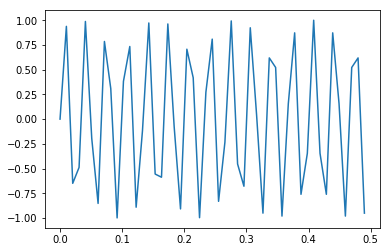

In [22]:
f1 = 30
A1 = 1
phi1 = 0
Fs = 100
ti = 0
tf = 0.5

t = np.linspace(ti, tf - 1 / Fs, Fs * tf - 1)
signalS1 = np.multiply(A1, np.sin(2 * np.pi * f1 * t + phi1))

plt.plot(t, signalS1)

Creating second sin signal s2

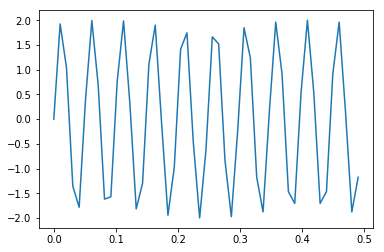

In [23]:
A2 = 2
f2 = 510
signalS2 = np.multiply(A2, np.sin(2 * np.pi * f2 * t + phi1))
plt.plot(t, signalS2)


Adding second sinusoid s2 to s1

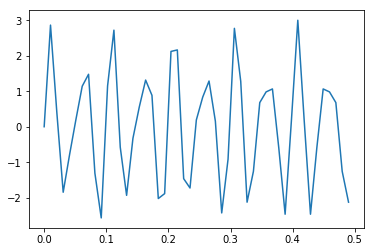

In [24]:
sumedSignal = signalS1 + signalS2
plt.plot(t, sumedSignal)


DFT calculation before the anti-aliasing filter

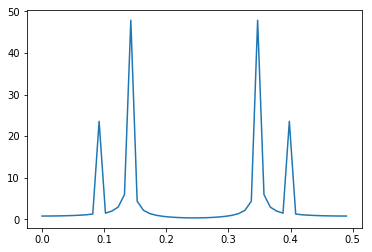

In [25]:
Xf_s12 = np.abs(np.fft.fftshift(np.fft.fft( sumedSignal )))
plt.plot(t, Xf_s12)

Creating anti-aliasing filter

Text(0, 0.5, 'Amplitude [dB]')

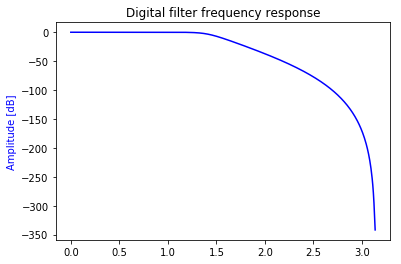

In [26]:
Wp = 40/Fs
Ws = 50/Fs 
[ N,Wn ] = signal.buttord( Wp , Ws , 0.5 , 10 ) 
[ b,a ] = signal.butter( N, Wn )
w, h =signal.freqz( b , a ) 

plt.title('Digital filter frequency response')
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')

Filtration of signal s12 by anti-aliasing filter

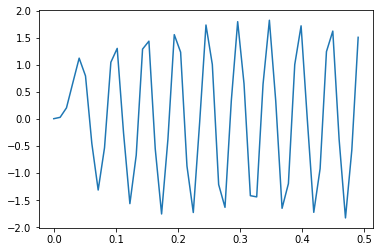

In [27]:
s12_filter = signal.lfilter(b,a,sumedSignal) 
plt.plot(t,s12_filter)

Calculation of the DFT after filtering

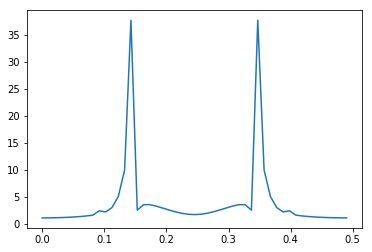

In [28]:
Xf_s12_filter = np.abs(np.fft.fftshift(np.fft.fft( s12_filter )))
plt.plot(t, Xf_s12_filter)